In [1]:
import cedalion
import cedalion.testing.simData
import cedalion.testing.simEvents

from cedalion.vis.plot_nirs_inline import plot as nirs_show
# This will allow matplotlib to work as a widget (needs "pip install ipympl")
%matplotlib widget


# Testing Simulation classes
I created a set of realistic data simulation modules based on the tools in the AnalyzIR toolbox.  These form the basis for being able to test and compare code using ROC tools (also in the testing package).

Currently, I have four basic tools:
* cedalion.testing.simData.defaultProbe2D().  Creates a basic 2d probe object
* cedalion.testing.simData.ARnoise().  Creates a default data set ['amp'] entry with spatial and temporal structured noise
* cedalion.testing.simEvents.rand_stim_design().  Generate a random event related stim object
* cedalion.testing.simData.Data().   Uses a noise timecourse and stim time course to simulate HRFs 

In [2]:
noise=cedalion.testing.simData.ARnoise()

# This function will simulate fNIRS CW raw amp data with AR noise
#    This matches the defaults for the nirs toolbox nirs.modules.simARNoise
#    
#    Inputs:
#        geo2d.  2d probe structure.     {Default calls defaultProbe()}
#        measList: Dictionary containing {Default calls defaultProbe()}
#                channel: xr.DataArray
#                wavelength: List[float]
#        t:      time variable.  np.array {Default 0-300s @ 10Hz}
#        P:      AR model order (calls randAR(P) to generate) {default 10}
#        sigma:  Spatial covariance noise prior {default 0.33}
#
#    Outputs:
#        rec:    Cedalion recording structure 


In [3]:
stim = cedalion.testing.simEvents.rand_stim_design()

#
#        This function generates a random event-related design
#        
#        Inputs:
#            t: time np.array {default 0-300s @ 10Hz}
#            stim_dur: duration of events (float; seconds) {default 2s}
#            stim_space: (float seconds) {default 7s}.  This is the average time between the onsets of events
#            ncond:  Number of conditions to simulate {default 1}. Events are named "A","B",...
#
#        Outputs:
#            stim design: pandas.DataFrame

In [4]:

noise,truth=cedalion.testing.simData.Data(snr=25)

#        Function for generating simulated recording with HRF added
#
#        Inputs:
#            noise:  cedalion recording class.   
#                This is the data to use to add the synthetic HRF to.  This may be either a simulated noise recording or
#                real data.  {Default use cedalion.testing.simData.ARnoise()}
#            stim:   stim events pd.DataFrame
#                This is the timing to use for generating the HRF.  {Default use simEvents.rand_stim_design()}
#            snr:    float {default 0.5}
#                SNR to use for generating HRF.  SNR is defined from the whitened innovations of the recording data
#            channels:  np.array of indices (matching recording) to add events to
#                If not provides {default None}, then randomly 1/2 of the channels will be selected and used
#            basis:  glm basis set to use {default Gamma(tau=0s,sigma=3s,T=3s)}
#
#        Outputs:
#            rec:    recording with the HRF added to the amp (raw) timecourse 
#            truth:  xr.DataArray indicating (binary) where the simulated HRF was added
#                Note- the HRF is added in chromo space and passed back to OD and raw timecourses 


In [5]:
import cedalion.pipelines.modules.preproccessing as prep
job = prep.intensity_opticaldensity()
#job = filters.bandpass_filter(job)
job = prep.mbll(job)
noise=job.run(noise)

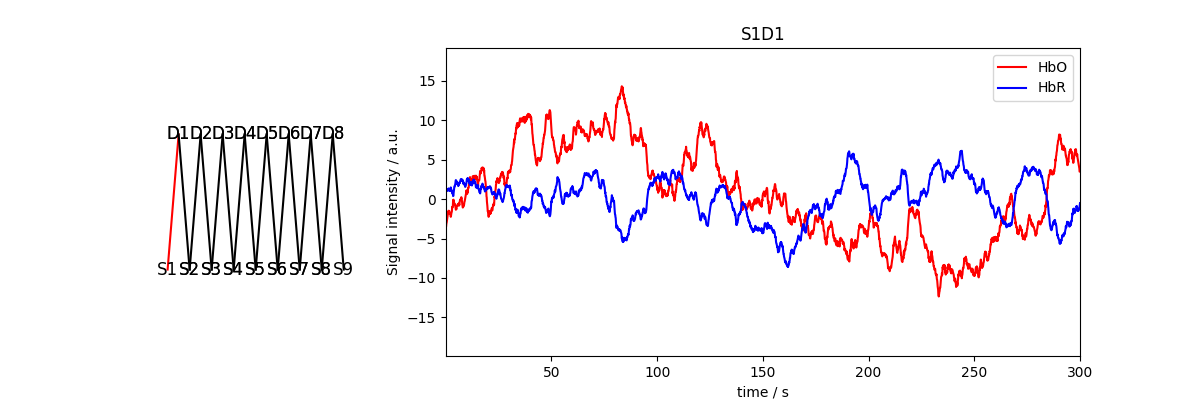

In [6]:
nirs_show(noise,'conc')
# This draws an interactive view of the data (HOMER-style)


In [7]:
noise,truth=cedalion.testing.simData.Data(snr=25,modifiers=[cedalion.testing.simData.simMotionArtifact])



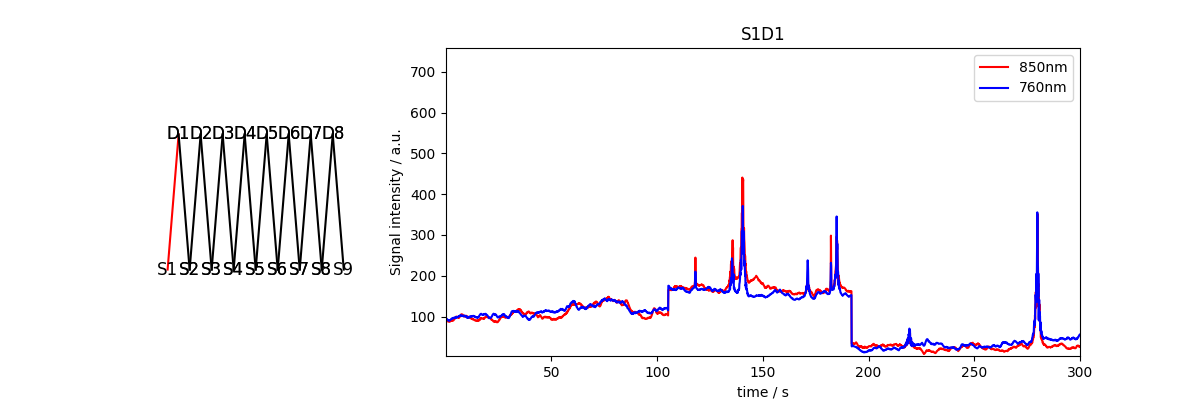

In [9]:
nirs_show(noise)